In [1]:
import numpy as np
import matplotlib.pyplot as plt

## a)

In [2]:
# lattice points
A = 4
h = 0.001
N = 25
R = 2

x = np.linspace(-A, A, N)
y = x.copy()
X, Y = np.meshgrid(x, y)

cylinder_tape = np.sqrt(X**2 + Y**2)


## b)

In [3]:
def flux_potential(x, y, R = 2):
    V = 2 # cm/s
    return V * x * (1 - (R**2 / (x**2 + y**2)))

## c)

In [4]:
def central_partial_derivative_x(f, x, y, h):
    return (f(x + h, y) - f(x - h, y)) / (2 * h)


def central_partial_derivative_y(f,x, y, h):
    return -(f(x, y + h) - f(x, y - h)) / (2 * h)


In [5]:
# Return field components on V_x, V_y
def field(f, x, y, h):
    return central_partial_derivative_x(f, x, y, h), central_partial_derivative_y(f, x, y, h)

In [6]:
V_x = np.zeros((N, N))
V_y = np.zeros((N, N))

## d)

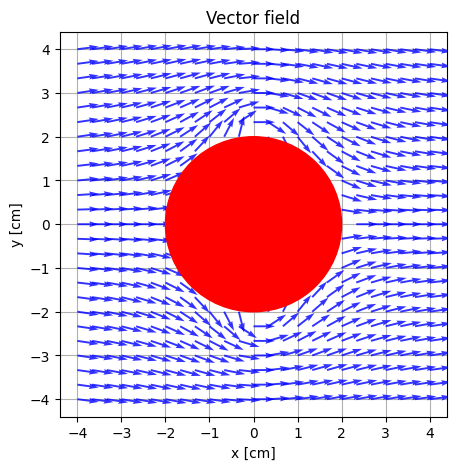

In [7]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
for i in range(0, 25):
    for j in range(25):
        if (cylinder_tape[i, j]) > R:
            V_x[i, j], V_y[i, j] = field(flux_potential, x[i], y[j], h)
            ax.quiver(x[i],
                      y[j],
                      V_x[i, j],
                      V_y[i, j],
                      color='b',
                      alpha=0.8,
                      width=0.005)
            
#Create circle to represent cylinder
circle = plt.Circle((0, 0), R, color='r', fill=True)
ax.add_patch(circle)

ax.set(xlabel='x [cm]', ylabel='y [cm]')
ax.set_title('Vector field')
ax.grid()
ax.set_axisbelow(True)
plt.show()